In [1]:
# Import the course packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the two datasets
gapminder = pd.read_csv("datasets/gapminder.csv")
brics = pd.read_csv("datasets/brics.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a fixed dataset with 45 entries
data = {
    "Area": [
        "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15",
        "A16", "A17", "A18", "A19", "A20", "A21", "A22", "A23", "A24", "A25", "A26", "A27", "A28", "A29",
        "A30", "A31", "A32", "A33", "A34", "A35", "A36", "A37", "A38", "A39", "A40", "A41", "A42", "A43", "A44", "A45"
    ],
    "Population_Density": [
        1500, 4500, 2000, 5000, 3000, 4000, 3500, 2200, 4800, 2600, 5200, 2900, 3100, 4300, 1500,
        3800, 2400, 5100, 2800, 3500, 2200, 4200, 1500, 4800, 2600, 5000, 3300, 2100, 4900, 2800,
        3700, 2700, 5300, 2400, 5100, 3200, 4400, 2100, 5500, 2600, 3900, 2500, 5600, 3100, 3400
    ],
    "Green_Space": [
        30, 15, 40, 10, 35, 20, 25, 42, 18, 38, 12, 33, 29, 14, 45,
        22, 36, 13, 31, 17, 24, 21, 39, 11, 44, 18, 28, 15, 32, 23,
        41, 19, 34, 27, 16, 43, 26, 20, 29, 14, 37, 12, 40, 22, 33
    ],
    "Avg_Income": [
        5000, 3000, 5500, 2500, 4800, 3200, 4000, 5300, 3100, 4700, 2600, 4900, 4400, 3000, 6000,
        3500, 5400, 2700, 5200, 3400, 4100, 2900, 5500, 2800, 4600, 3700, 4500, 3000, 5800, 3600,
        4300, 3100, 5700, 2500, 4900, 4100, 3900, 3200, 5800, 3700, 4800, 3400, 5600, 3900, 4500
    ],
    "Sustainable": [
        1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   Area  Population_Density  Green_Space  Avg_Income  Sustainable
0    A1                1500           30        5000            1
1    A2                4500           15        3000            0
2    A3                2000           40        5500            1
3    A4                5000           10        2500            0
4    A5                3000           35        4800            1
5    A6                4000           20        3200            0
6    A7                3500           25        4000            1
7    A8                2200           42        5300            1
8    A9                4800           18        3100            0
9   A10                2600           38        4700            1
10  A11                5200           12        2600            0
11  A12                2900           33        4900            1
12  A13                3100           29        4400            1
13  A14                4300           14        3000            0
14  A15   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Features (X) and Target (y)
X = df.drop(columns=["Area", "Sustainable"]) # Drop non-numerical and target columns
y = df["Sustainable"].values
print(X.shape, y.shape)

# split the dataset (80% train, 30% test)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# fit a classifier
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))

(45, 3) (45,)
0.7692307692307693
0.8125


Best k: 5


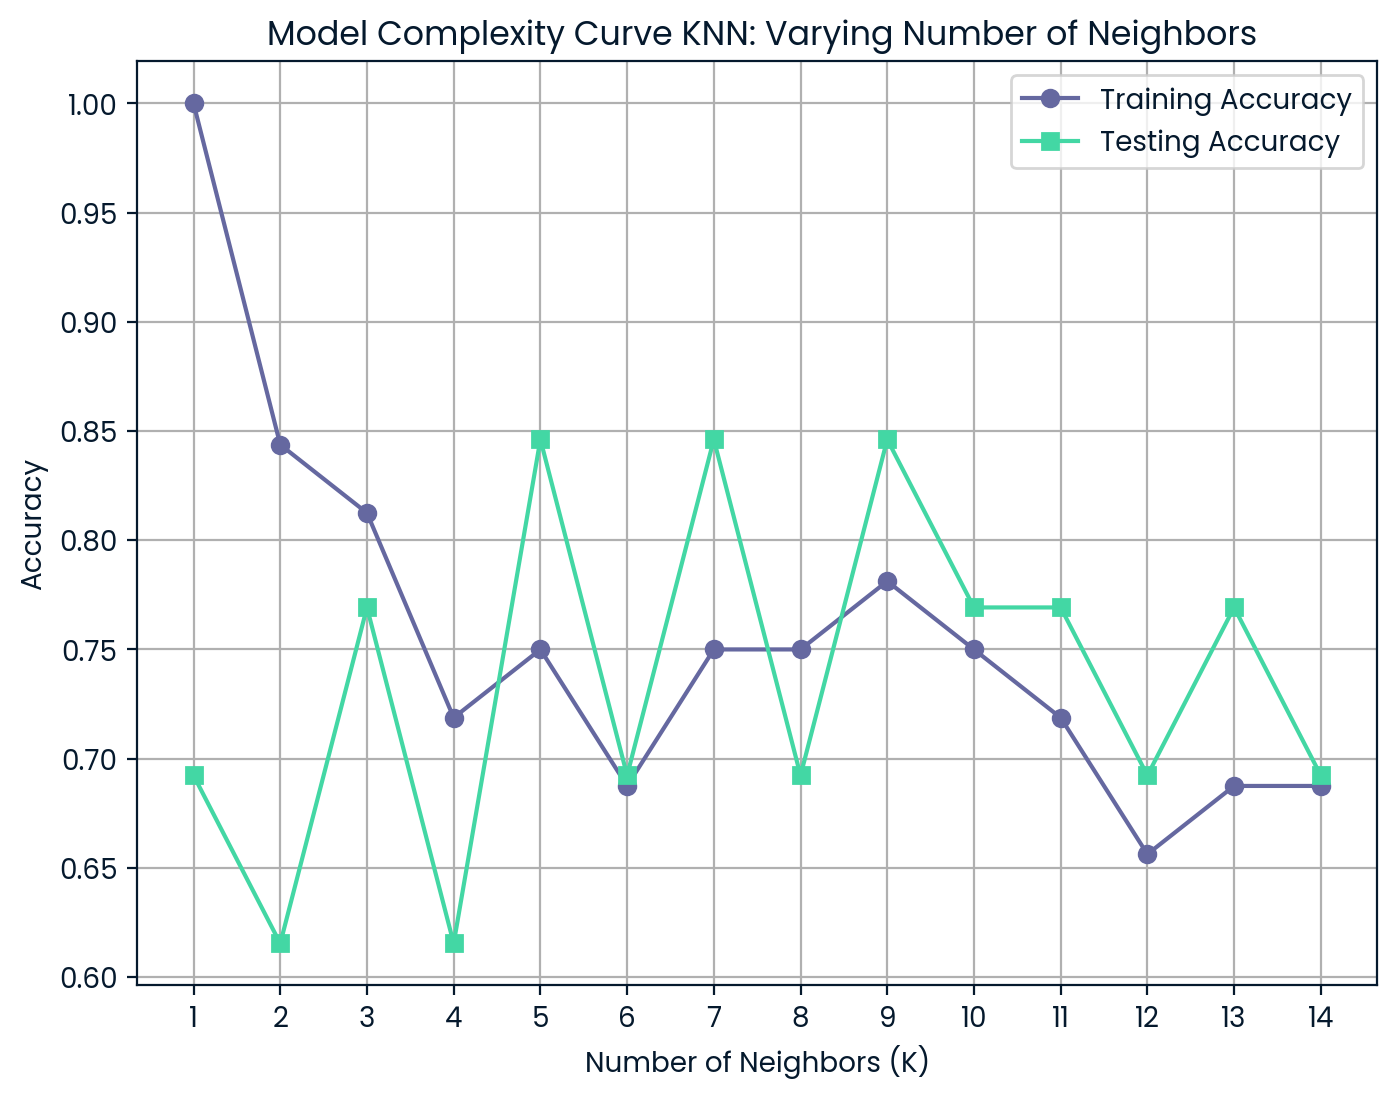

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define range of neighbors to test
neighbors = np.arange(1, 15)  # Testing K from 1 to 20

# Dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Loop through different K values
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train model

    # Store training and testing accuracy
    train_accuracies[k] = accuracy_score(y_train, knn.predict(X_train))
    test_accuracies[k] = accuracy_score(y_test, knn.predict(X_test))

best_k = max(test_accuracies, key=test_accuracies.get)
print("Best k:", best_k)


# Convert dictionary values to lists for plotting
plt.figure(figsize=(8, 6))
plt.title(" Model Complexity Curve KNN: Varying Number of Neighbors")
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy", marker="o")
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy", marker="s")
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.xticks(neighbors)
plt.grid(True)  # Add grid for better readability
plt.show()

In [5]:
# Predict test data
y_pred = knn.predict(X_test)

# Print predictions
print(y_pred)

[1 0 1 1 1 1 1 1 0 0 0 1 0]


In [6]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

# Display confusioon matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.75      0.75         8

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13

[[3 2]
 [2 6]]
